In [2]:
from graphviz import Digraph

class BSTNode:
    def __init__(self, value, parent):
        self.value = value
        self.parent = parent
        self.left = None
        self.right = None
        self.height = 0

    def __repr__(self):
        return f"Node with value {self.value}"

    def insert(self, node):
        if node is None:
            return
        else:
            if node.value < self.value:
                if self.left is None:
                    self.left = node
                    node.parent = self
                else:
                    self.left.insert(node)
            else:
                if self.right is None:
                    self.right = node
                    self.right.parent = self
                else:
                    self.right.insert(node)


def update_height(node):
    while node is not None:
        node.height = max(node.left.height if node.left else 0 , node.right.height if node.right else 0) + 1
        node = node.parent


class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        node = BSTNode(value, None)

        if self.root is None:
            self.root = node
        else:
            self.root.insert(node)

        update_height(node)

    def visualize(self, filename='tree'):
        dot = Digraph(comment='Binary Search Tree')
        self._add_nodes(dot, self.root)
        dot.render(filename, format='png', cleanup=True)

    def _add_nodes(self, dot, root):
        if root:
            dot.node(str(root.value))
            if root.left:
                dot.edge(str(root.value), str(root.left.value), label='L')
                self._add_nodes(dot, root.left)
            if root.right:
                dot.edge(str(root.value), str(root.right.value), label='R')
                self._add_nodes(dot, root.right)


tree = BinarySearchTree()
tree.insert(5)
tree.insert(3)
tree.insert(7)
tree.insert(1)
tree.insert(4)
tree.insert(6)

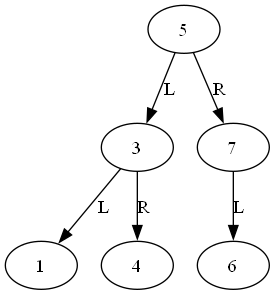

In [3]:
from IPython.display import Image, display
 
display(Image(filename='bst1.png'))

# 1. 위 tree는 balanced tree 인가? (AVL tree 관점에서 확인하시오) check balanced 등의 코드를 정의하여 코드로 확인하시오. (10점)

In [4]:
def check_balance(node):
    if node is None:
        return "True it's balanced"

    left_height = node.left.height if node.left else 0
    right_height = node.right.height if node.right else 0
    left_right_height_diff = abs(left_height - right_height)

    if left_right_height_diff >= 2:
        return "False it's not balanced"

    return check_balance(node.left) and check_balance(node.right)


print(check_balance(tree.root))

True it's balanced


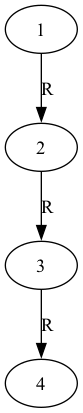

In [5]:
tree = BinarySearchTree()
tree.insert(1)
tree.insert(2)
tree.insert(3)
tree.insert(4)
 
tree.visualize('bst2')
display(Image(filename='bst2.png'))

# 2. 위 tree는 balanced 인가? 1번과 같은 방법으로 확인하시오 (10점)

In [49]:
print(check_balance(tree.root))

False it's not balanced


# 3. 위 BST를 상속하여 AVL tree class를 만들고, insert를 1,2,3,4,... 15 순서대로 입력하고 rotation 이 총 몇번 수행되는지 출력하시오. 또한 최종 결과를 위와 같이 시각화 하시오 (30점)  

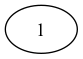

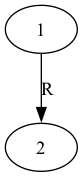

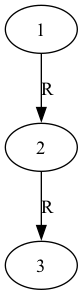

1노드에 대한 left rotate 발생


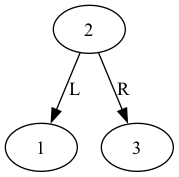

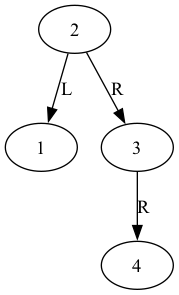

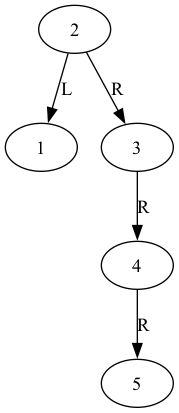

3노드에 대한 left rotate 발생


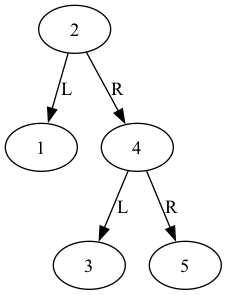

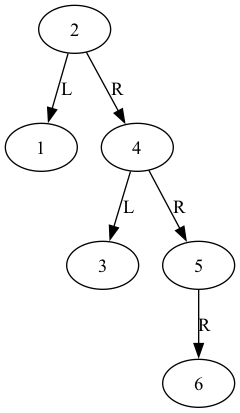

2노드에 대한 left rotate 발생


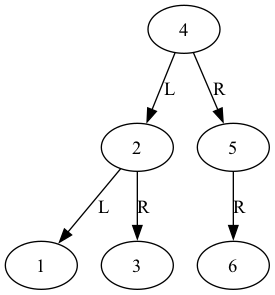

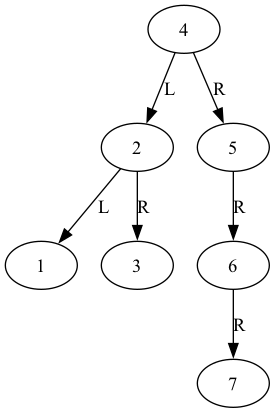

5노드에 대한 left rotate 발생


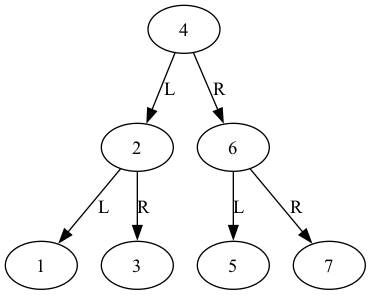

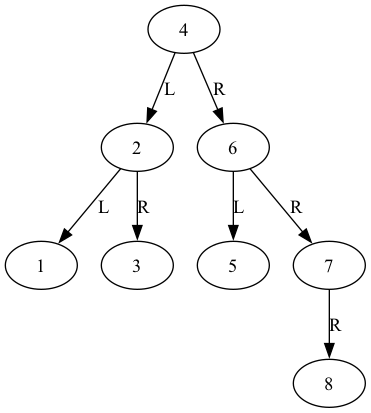

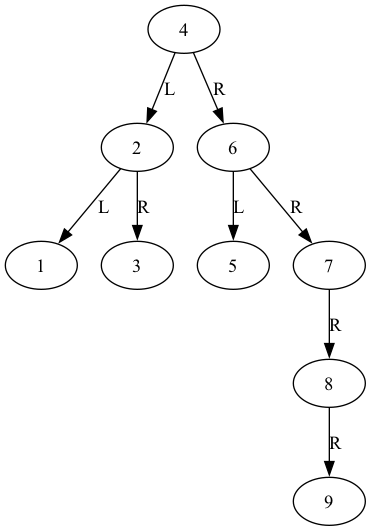

7노드에 대한 left rotate 발생


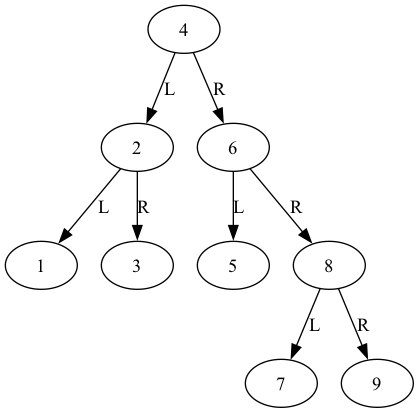

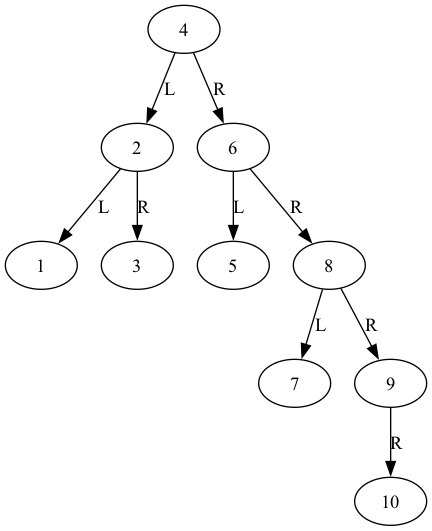

6노드에 대한 left rotate 발생


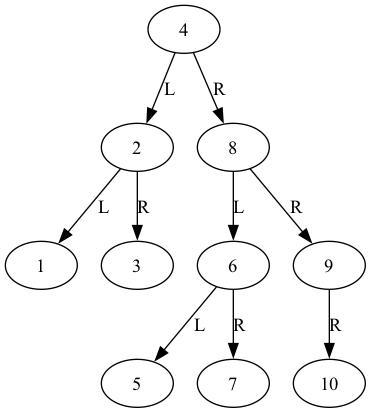

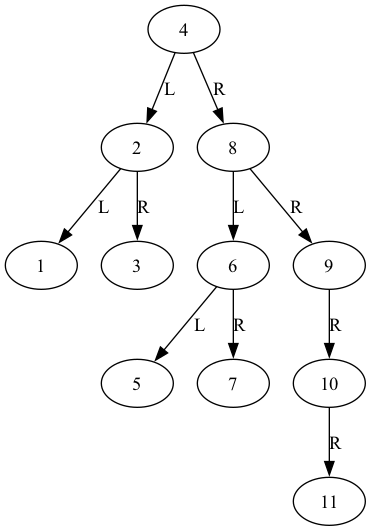

9노드에 대한 left rotate 발생


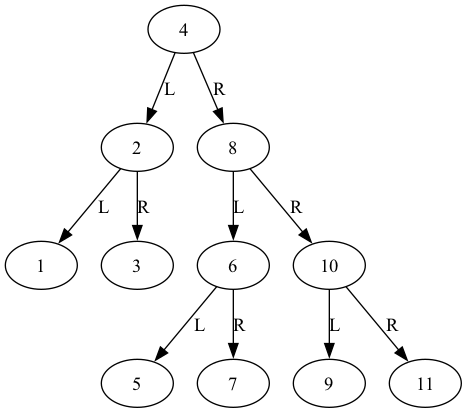

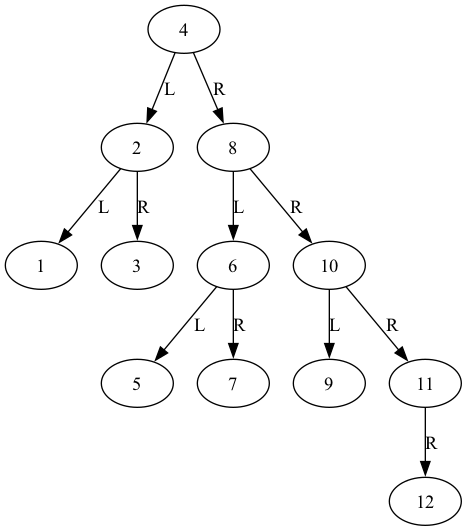

4노드에 대한 left rotate 발생


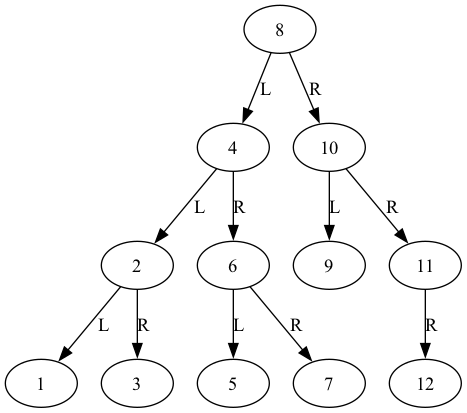

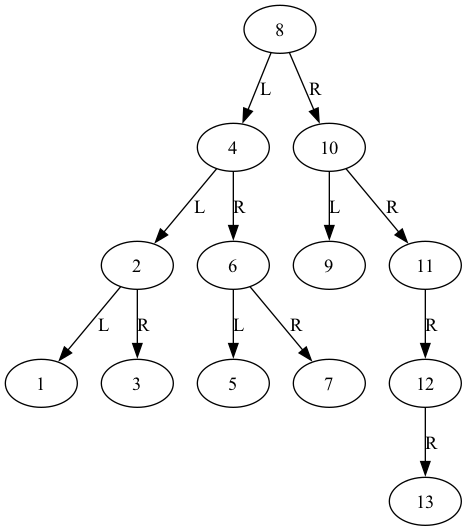

11노드에 대한 left rotate 발생


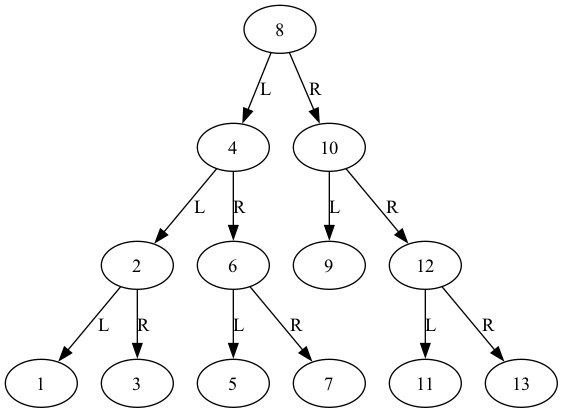

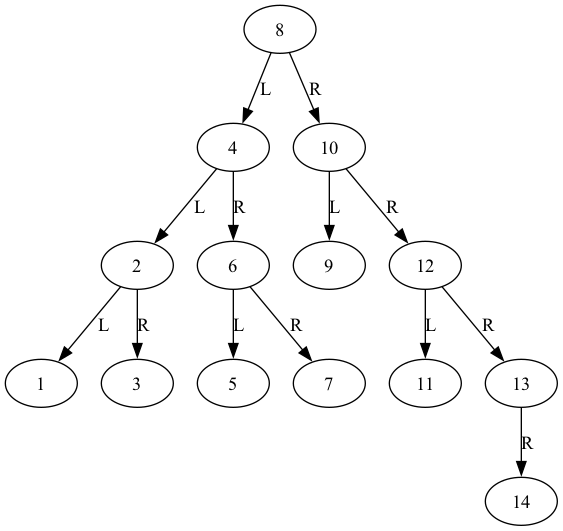

10노드에 대한 left rotate 발생


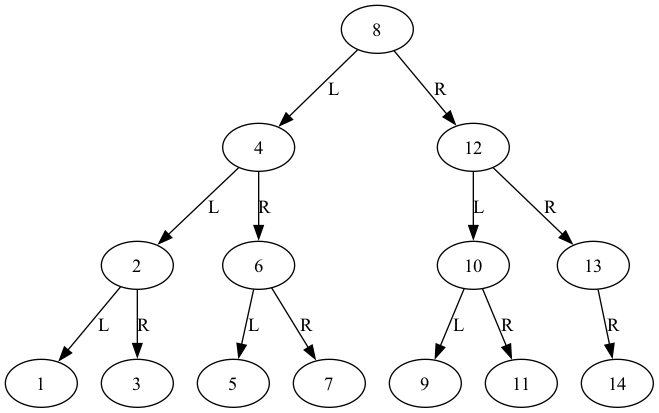

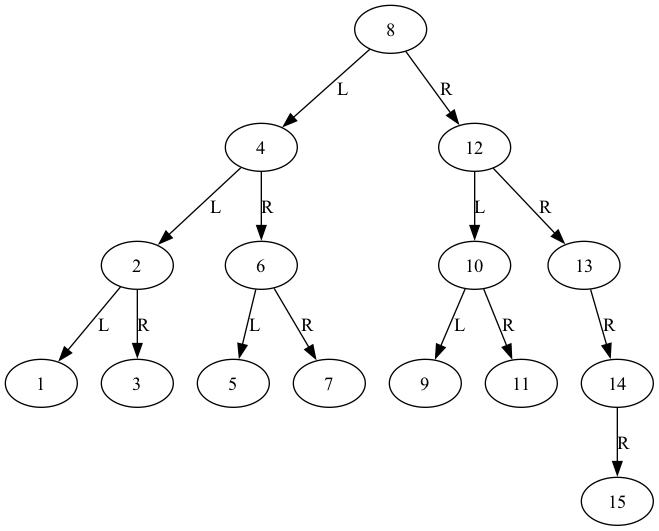

13노드에 대한 left rotate 발생


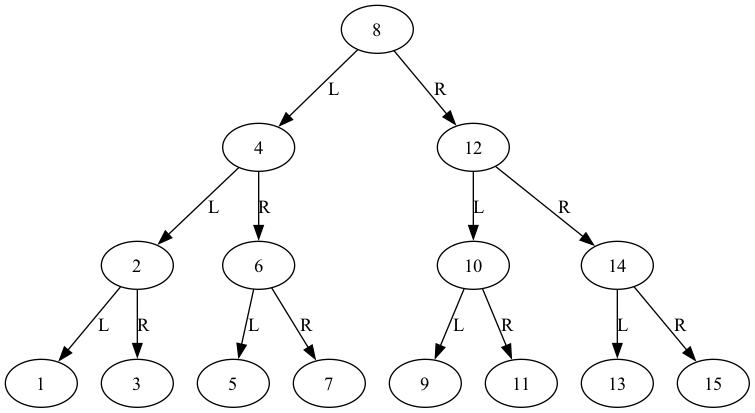

11번 rotate 발생


In [12]:
# from graphviz import Digraph

class BSTNode:
    def __init__(self, value, parent):
        self.value = value
        self.parent = parent
        self.left = None
        self.right = None
        self.height = 0

    def __repr__(self):
        return f"Node with value {self.value}"

    def insert(self, node):
        if node is None:
            return
        else:
            if node.value < self.value:
                if self.left is None:
                    self.left = node
                    node.parent = self
                else:
                    self.left.insert(node)
            else:
                if self.right is None:
                    self.right = node
                    self.right.parent = self
                else:
                    self.right.insert(node)


def update_height(node):
    while node is not None:
        node.height = max(height(node.left) , height(node.right)) + 1
        node = node.parent
def height(node):
    if node is None:
        return -1
    else:
        return node.height

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        node = BSTNode(value, None)

        if self.root is None:
            self.root = node
        else:
            self.root.insert(node)

        update_height(node)
        return node

    # def visualize(self, filename='tree'):
    #     dot = Digraph(comment='Binary Search Tree')
    #     self._add_nodes(dot, self.root)
    #     dot.render(filename, format='png', cleanup=True)
    #
    # def _add_nodes(self, dot, root):
    #     if root:
    #         dot.node(str(root.value))
    #         if root.left:
    #             dot.edge(str(root.value), str(root.left.value), label='L')
    #             self._add_nodes(dot, root.left)
    #         if root.right:
    #             dot.edge(str(root.value), str(root.right.value), label='R')
    #             self._add_nodes(dot, root.right)


def check_balance(node):
    if node is None:
        return "True it's balanced"

    # left_height = node.left.height if node.left else 0
    # right_height = node.right.height if node.right else 0

    left_right_height_diff = abs(height(node.left) - height(node.right))

    if left_right_height_diff >= 2:
        return "False it's not balanced"

    return check_balance(node.left) and check_balance(node.right)

class AVL(BinarySearchTree):
    def __init__(self):
        super().__init__()
        self.rot_count = 0

    def left_rotate(self, node):
        x = node
        y = x.right
        y.parent = x.parent
        if y.parent is None:
            self.root = y
        else:
            if y.parent.left is x:
                y.parent.left = y
            elif y.parent.right is x:
                y.parent.right = y
        x.right = y.left
        if x.right is not None:
            x.right.parent = x
        y.left = x
        x.parent = y
        update_height(x)
        update_height(y)
        print(f"{node.value}노드에 대한 left rotate 발생")
        tree.visualize('bst2')
        display(Image(filename='bst2.png'))
        self.rot_count += 1

    def right_rotate(self, node):          #right Rotate
        x = node
        y = x.left
        y.parent = x.parent
        if y.parent is None:
            self.root = y
        else:
            if y.parent.left is x:
                y.parent.left = y
            elif y.parent.right is x:
                y.parent.right = y
        x.left = y.right
        if x.left is not None:
            x.left.parent = x
        y.right = x
        x.parent = y
        update_height(x)
        update_height(y)
        print(f"{node.value}노드에 대한 right rotate 발생")
        tree.visualize('bst2')
        display(Image(filename='bst2.png'))
        self.rot_count += 1

    def rebalanced(self, node):   # x가 처음으로 규칙을 위반했을때 => AVL 트리 property 안지켜졌을때 rebalance하는 (메인코드네) 그니까 insert 할때마다 rebalance해주는거라 rotate는 최대 2번임.
        rot_count = 0
        while node is not None:
            if height(node.left) >= 2 + height(node.right):
                if height(node.left.left) >= height(node.left.right):  # 이건 왼쪽으로 치우쳐진 경우중 일직선일때는 right rotate 한번만 해도 되는것임.
                    self.right_rotate(node)
                else:  # 왼쪽 치우쳐진 경우중 zigzag일때 left rotate후 right rotate.
                    self.left_rotate(node.left)
                    self.right_rotate(node)
            elif height(node.right) >= 2 + height(node.left):  # 걍 반대. 오른쪽으로 치우쳐진 경우임.
                if height(node.right.right) >= height(node.right.left):
                    self.left_rotate(node)
                else:
                    self.right_rotate(node.right)
                    self.left_rotate(node)

            update_height(node)
            node = node.parent

    def insert(self, k):
        node = super(AVL, self).insert(k)
        tree.visualize('bst2')
        display(Image(filename='bst2.png'))
        self.rebalanced(node)

    def visualize(self, filename='tree'):
        dot = Digraph(comment='Binary Search Tree')
        self._add_nodes(dot, self.root)
        dot.render(filename, format='png', cleanup=True)

    def _add_nodes(self, dot, root):
        if root:
            dot.node(str(root.value))
            if root.left:
                dot.edge(str(root.value), str(root.left.value), label='L')
                self._add_nodes(dot, root.left)
            if root.right:
                dot.edge(str(root.value), str(root.right.value), label='R')
                self._add_nodes(dot, root.right)

tree = AVL()
for i in range (1, 16):
    tree.insert(i)
    
    
print(f"{tree.rot_count}번 rotate 발생")

# 4. 위 문제를 insert 를 어떤 순서대로 넣었다면 rotation 이 한번도 발생하지 않을까? 임의의 insert 순서를 찾아서 보이시오 (20점)

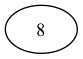

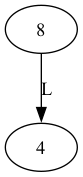

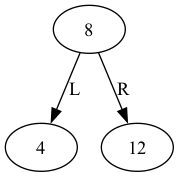

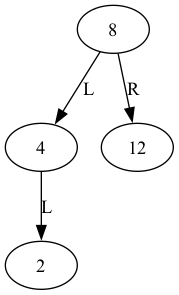

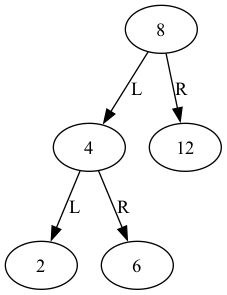

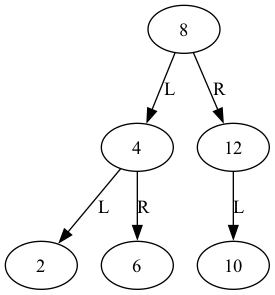

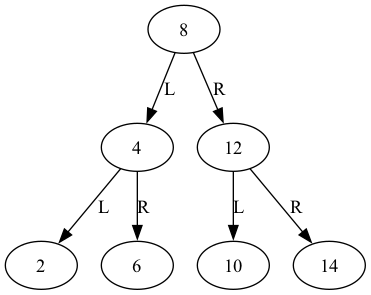

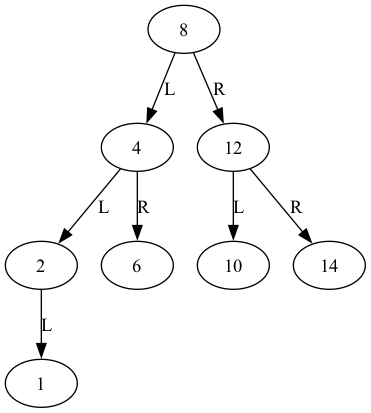

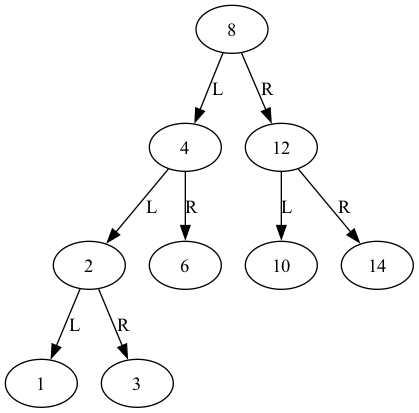

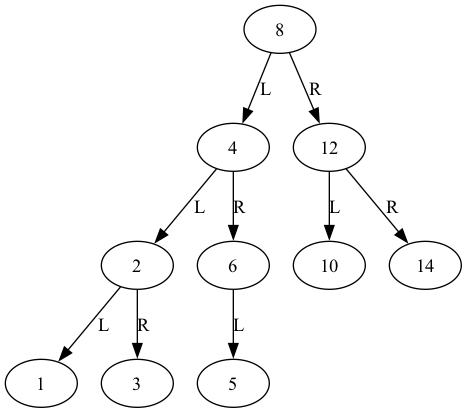

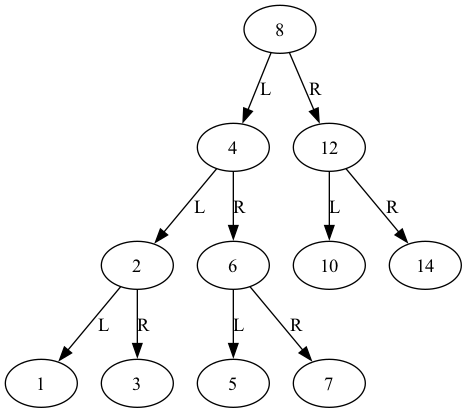

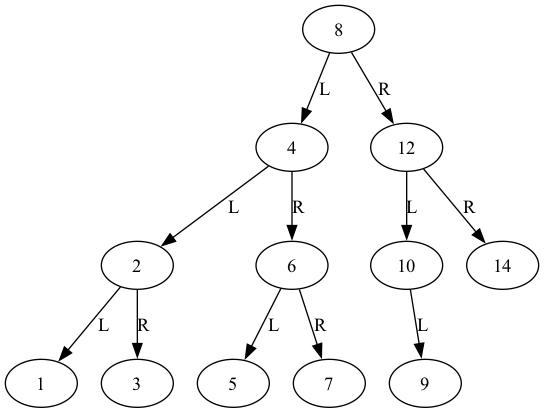

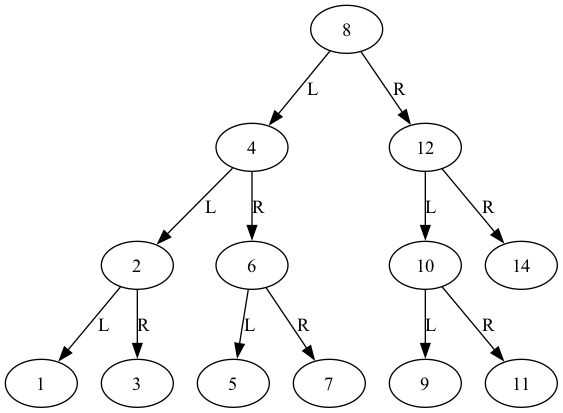

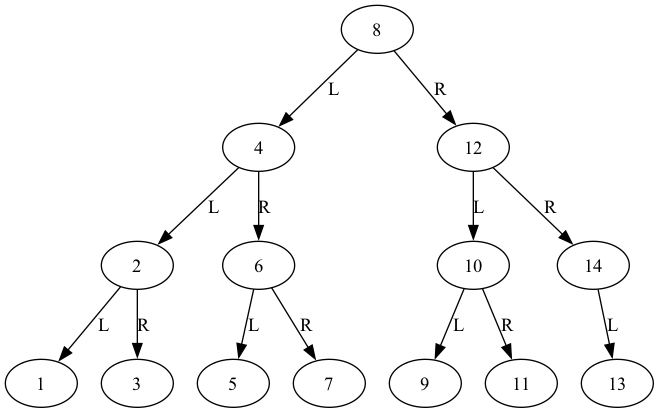

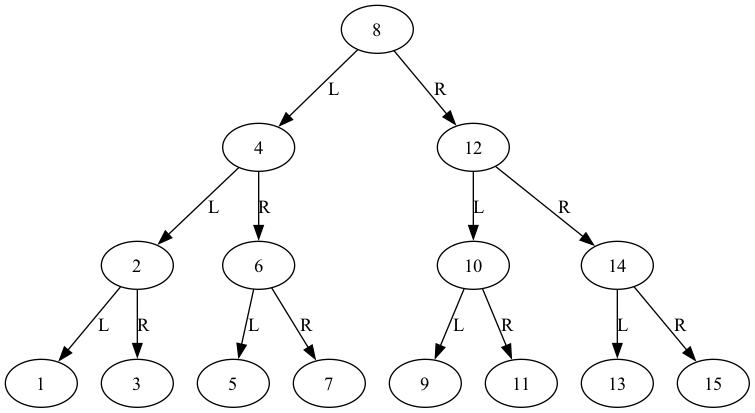

0번 rotate 발생


In [21]:
tree = AVL()
no_rotate_insertion_order = [8, 4, 12, 2, 6, 10, 14, 1, 3, 5, 7, 9, 11, 13, 15]
for i in no_rotate_insertion_order:
    tree.insert(i)
print(f"{tree.rot_count}번 rotate 발생")

# 5. 위 4번 문제에서 영감을 얻어 정렬된 list가 있을 때, AVL tree가 아닌 BinarySearchTree 에서 balance된 tree를 만드는 함수를 만드시오 insert 순서를 조작하는 함수를 만들거나, left, right를 붙여나가는 함수를 recursive 하게 만들어도 됨. 잘 생각해보고,  [1,2,3,4,....15] 로 정렬된 list를 예시로 보여주시오 (30점) 

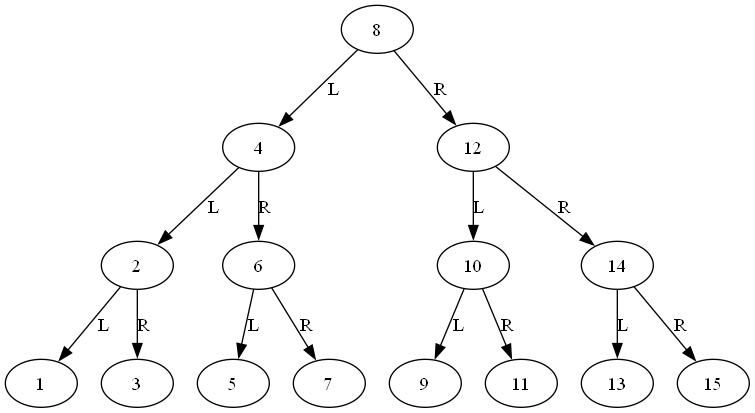

In [16]:
def manipulate_insertion_to_maintain_balanced_in_BST(sorted_arr):